In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key
import time
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

625

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | thompson
Processing Record 2 of Set 1 | port elizabeth
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | marquette
Processing Record 5 of Set 1 | artyk
City not found. Skipping...
Processing Record 6 of Set 1 | segou
Processing Record 7 of Set 1 | morondava
Processing Record 8 of Set 1 | kibaya
Processing Record 9 of Set 1 | bluff
Processing Record 10 of Set 1 | damietta
Processing Record 11 of Set 1 | east london
Processing Record 12 of Set 1 | nikolskoye
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | busselton
Processing Record 15 of Set 1 | zenzeli
Processing Record 16 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 17 of Set 1 | tiksi
Processing Record 18 of Set 1 | esperance
Processing Record 19 of Set 1 | mataura
Processing Record 20 of Set 1 | sibiti
Processing Record 21 of Set 1 | atuona
Processing Record 22 of Set 1 | al

Processing Record 37 of Set 4 | sugal
Processing Record 38 of Set 4 | goma
Processing Record 39 of Set 4 | karamea
City not found. Skipping...
Processing Record 40 of Set 4 | nizwa
Processing Record 41 of Set 4 | codrington
Processing Record 42 of Set 4 | balabac
Processing Record 43 of Set 4 | aktau
Processing Record 44 of Set 4 | olinda
Processing Record 45 of Set 4 | galle
Processing Record 46 of Set 4 | luderitz
Processing Record 47 of Set 4 | baiyin
Processing Record 48 of Set 4 | saint-pierre
Processing Record 49 of Set 4 | saint-philippe
Processing Record 50 of Set 4 | chuy
Processing Record 1 of Set 5 | mahebourg
Processing Record 2 of Set 5 | srivardhan
Processing Record 3 of Set 5 | kon tum
Processing Record 4 of Set 5 | yakhroma
Processing Record 5 of Set 5 | georgetown
Processing Record 6 of Set 5 | kungurtug
Processing Record 7 of Set 5 | secovce
Processing Record 8 of Set 5 | yar-sale
Processing Record 9 of Set 5 | marzuq
Processing Record 10 of Set 5 | north bend
Process

Processing Record 25 of Set 8 | lola
Processing Record 26 of Set 8 | keita
Processing Record 27 of Set 8 | gamboma
Processing Record 28 of Set 8 | kilindoni
Processing Record 29 of Set 8 | sambava
Processing Record 30 of Set 8 | oxford
Processing Record 31 of Set 8 | kahului
Processing Record 32 of Set 8 | sehithwa
Processing Record 33 of Set 8 | hammerfest
Processing Record 34 of Set 8 | saldanha
Processing Record 35 of Set 8 | colombia
Processing Record 36 of Set 8 | tahoua
Processing Record 37 of Set 8 | tezu
Processing Record 38 of Set 8 | alice springs
Processing Record 39 of Set 8 | kirakira
Processing Record 40 of Set 8 | entebbe
Processing Record 41 of Set 8 | sinkat
City not found. Skipping...
Processing Record 42 of Set 8 | lucapa
Processing Record 43 of Set 8 | zhangjiakou
Processing Record 44 of Set 8 | dingle
Processing Record 45 of Set 8 | ilulissat
Processing Record 46 of Set 8 | sinnamary
Processing Record 47 of Set 8 | rabo de peixe
Processing Record 48 of Set 8 | kara

Processing Record 12 of Set 12 | biak
Processing Record 13 of Set 12 | moree
Processing Record 14 of Set 12 | kalamnuri
Processing Record 15 of Set 12 | padang
Processing Record 16 of Set 12 | pafos
Processing Record 17 of Set 12 | sao filipe
Processing Record 18 of Set 12 | rorvik
Processing Record 19 of Set 12 | jimenez
Processing Record 20 of Set 12 | plouzane
Processing Record 21 of Set 12 | ponta delgada
Processing Record 22 of Set 12 | altensteig
Processing Record 23 of Set 12 | berberati
Processing Record 24 of Set 12 | avera
Processing Record 25 of Set 12 | bhimunipatnam
Processing Record 26 of Set 12 | antalaha
Processing Record 27 of Set 12 | rio brilhante
Processing Record 28 of Set 12 | yafran
Processing Record 29 of Set 12 | likhoslavl
Processing Record 30 of Set 12 | sidlaghatta
Processing Record 31 of Set 12 | livno
Processing Record 32 of Set 12 | paradwip
City not found. Skipping...
Processing Record 33 of Set 12 | husavik
Processing Record 34 of Set 12 | tungor
Proces

In [7]:
len(city_data)

570

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Thompson,55.7435,-97.8558,-9.24,64,20,18.41,CA,2022-02-02 23:23:13
1,Port Elizabeth,-33.9180,25.5701,71.10,94,75,10.36,ZA,2022-02-02 23:23:13
2,Punta Arenas,-53.1500,-70.9167,48.31,71,75,6.91,CL,2022-02-02 23:19:08
3,Marquette,46.5333,-87.6335,9.84,64,100,9.15,US,2022-02-02 23:23:14
4,Segou,13.4317,-6.2157,73.29,15,0,9.69,ML,2022-02-02 23:23:14
5,Morondava,-20.2833,44.2833,80.69,85,78,7.07,MG,2022-02-02 23:22:06
6,Kibaya,-5.3000,36.5667,59.49,97,100,0.38,TZ,2022-02-02 23:23:14
7,Bluff,-46.6000,168.3333,58.80,64,100,17.20,NZ,2022-02-02 23:23:15
8,Damietta,31.4165,31.8133,55.29,48,61,7.70,EG,2022-02-02 23:23:15
9,East London,-33.0153,27.9116,74.53,94,67,12.88,ZA,2022-02-02 23:23:15


In [14]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df=city_data_df[new_column_order]

In [10]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Thompson,CA,2022-02-02 23:23:13,55.7435,-97.8558,-9.24,64,20,18.41
1,Port Elizabeth,ZA,2022-02-02 23:23:13,-33.9180,25.5701,71.10,94,75,10.36
2,Punta Arenas,CL,2022-02-02 23:19:08,-53.1500,-70.9167,48.31,71,75,6.91
3,Marquette,US,2022-02-02 23:23:14,46.5333,-87.6335,9.84,64,100,9.15
4,Segou,ML,2022-02-02 23:23:14,13.4317,-6.2157,73.29,15,0,9.69
5,Morondava,MG,2022-02-02 23:22:06,-20.2833,44.2833,80.69,85,78,7.07
6,Kibaya,TZ,2022-02-02 23:23:14,-5.3000,36.5667,59.49,97,100,0.38
7,Bluff,NZ,2022-02-02 23:23:15,-46.6000,168.3333,58.80,64,100,17.20
8,Damietta,EG,2022-02-02 23:23:15,31.4165,31.8133,55.29,48,61,7.70
9,East London,ZA,2022-02-02 23:23:15,-33.0153,27.9116,74.53,94,67,12.88


In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

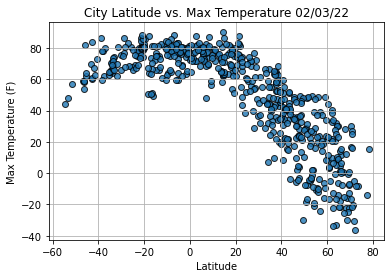

In [17]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

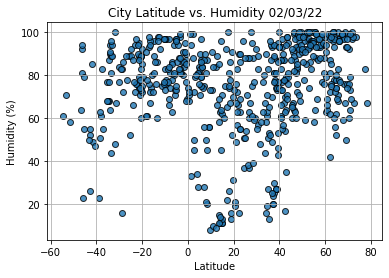

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

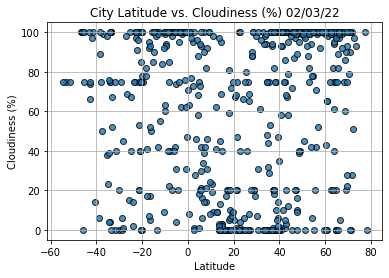

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

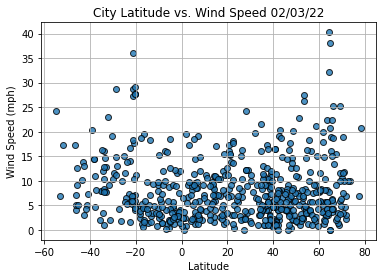

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()